<a href="http://www.louisville.edu"><img src = "https://scontent-ort2-2.xx.fbcdn.net/v/t1.6435-9/185393772_10157730198765899_6137133964003342304_n.jpg?_nc_cat=102&ccb=1-5&_nc_sid=6e5ad9&_nc_ohc=nhwGx_CPtF0AX-k_sR4&_nc_ht=scontent-ort2-2.xx&oh=00_AT9-NHyX-MdiUHq34g-aG-Cj16o8N4e1oJyIRb0ZiKdD2Q&oe=61F8FC7B" width = 400> </a>

<h1 align=center><font size = 5>CSE 551 Data Visualization</font></h1>
<h1 align=center><font size = 5> HW1 - Data visualization basic skills - area plots, histograms, and bar plots</font></h1>
<h1 align=center><font size = 5> Due time - sept 8th </font></h1>


# Exploring Datasets with *pandas* and Matplotlib<a id="0"></a>

In this homework, we will use Matplotlib library, together with Numpy and/or Pandas to create plots.

Toolkits: As we introcued in our lectures, please use [*pandas*](http://pandas.pydata.org/) and [**Numpy**](http://www.numpy.org/) for data wrangling, analysis, and visualization. The primary plotting library that we are exploring in the course is [Matplotlib](http://matplotlib.org/).

Dataset: Immigration to USA from 1980 to 2013. 

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Accessing Data](#2)<br>
2. [Visualizing Data using Matplotlib](#4) <br>
3. [Area Plots](#6) <br>
4. [Bar Plots](#8) <br>
5. [Pie Charts](#10) <br>
</div>
<hr>

# Accessing Data <a id="2"></a>

Import Primary Modules. The first thing we'll do is import two key data analysis modules: *pandas* and **Numpy**.

In [51]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Access the dataset and read it into a *pandas* dataframe.

In [52]:
df_usa = pd.read_csv('USA.csv', encoding='ISO-8859-1')

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Let's take a look at the first five items in our dataset.

In [53]:
df_usa.head(5)

,Type,Coverage,Country,AREA,Continent,REG,Region,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Less developed regions,722,...,2137,4749,3417,1753,2813,3165,2017,1648,1617,2196
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,More developed regions,30,...,3840,5947,7914,5737,5754,5137,4711,3612,3364,3186
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Less developed regions,175,...,805,1115,1300,1036,1037,1485,1305,1364,1369,1241
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Less developed regions,0,...,12,15,28,11,14,19,14,D,-,D
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,More developed regions,2,...,..,..,..,..,..,..,..,..,..,..


Let's find out how many entries there are in our dataset.

In [54]:
# print the dimensions of the dataframe
print(df_usa.shape)

(214, 43)


Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to `Introduction to Matplotlib and Line Plots` lab for the rational and detailed description of the changes.

#### 1. Clean up the dataset to remove columns that are not informative to us for visualization (eg. Type, AREA, REG).

In [55]:
df_usa.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_usa.head(5)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Less developed regions,722,1881,1569,2566,3222,2794,...,2137,4749,3417,1753,2813,3165,2017,1648,1617,2196
1,Albania,Europe,Southern Europe,More developed regions,30,11,23,22,32,45,...,3840,5947,7914,5737,5754,5137,4711,3612,3364,3186
2,Algeria,Africa,Northern Africa,Less developed regions,175,184,190,201,197,202,...,805,1115,1300,1036,1037,1485,1305,1364,1369,1241
3,American Samoa,Oceania,Polynesia,Less developed regions,0,0,7,7,0,0,...,12,15,28,11,14,19,14,D,-,D
4,Andorra,Europe,Southern Europe,More developed regions,2,3,2,1,0,0,...,..,..,..,..,..,..,..,..,..,..


Notice how the columns Type, Coverage, AREA, REG, and DEV got removed from the dataframe.

#### 2. For consistency, ensure that all column labels of type string.

In [56]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_usa.columns)

True

Notice how the above line of code returned *False* when we tested if all the column labels are of type **string**. So let's change them all to **string** type.

In [57]:
df_usa.columns = list(map(str, df_usa.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df_usa.columns)

True

#### 3. Set the country name as index - useful for quickly looking up countries using .loc method.

In [58]:
df_usa.set_index('Country', inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_usa.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Less developed regions,722,1881,1569,2566,3222,2794,2831,...,2137,4749,3417,1753,2813,3165,2017,1648,1617,2196
Albania,Europe,Southern Europe,More developed regions,30,11,23,22,32,45,53,...,3840,5947,7914,5737,5754,5137,4711,3612,3364,3186
Algeria,Africa,Northern Africa,Less developed regions,175,184,190,201,197,202,183,...,805,1115,1300,1036,1037,1485,1305,1364,1369,1241
American Samoa,Oceania,Polynesia,Less developed regions,0,0,7,7,0,0,0,...,12,15,28,11,14,19,14,D,-,D
Andorra,Europe,Southern Europe,More developed regions,2,3,2,1,0,0,1,...,..,..,..,..,..,..,..,..,..,..


Notice how the country names now serve as indices.

#### 4. Clean up the obove dataframe - to do: turn non-numeric cells in years 1980-2013 to 0 or NAN

In [59]:
# add your implementation here

df_usa = df_usa.apply(pd.to_numeric, errors='coerce')

In [60]:
df_usa.head(20)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,722.0,1881.0,1569.0,2566.0,3222.0,2794.0,2831.0,...,2137.0,4749.0,3417.0,1753.0,2813.0,3165.0,2017.0,1648.0,1617.0,2196.0
Albania,NaN,NaN,NaN,30.0,11.0,23.0,22.0,32.0,45.0,53.0,...,3840.0,5947.0,7914.0,5737.0,5754.0,5137.0,4711.0,3612.0,3364.0,3186.0
Algeria,NaN,NaN,NaN,175.0,184.0,190.0,201.0,197.0,202.0,183.0,...,805.0,1115.0,1300.0,1036.0,1037.0,1485.0,1305.0,1364.0,1369.0,1241.0
American Samoa,NaN,NaN,NaN,0.0,0.0,7.0,7.0,0.0,0.0,0.0,...,12.0,15.0,28.0,11.0,14.0,19.0,14.0,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,2.0,3.0,2.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,194.0,144.0,126.0,116.0,146.0,120.0,116.0,...,107.0,188.0,272.0,199.0,221.0,173.0,148.0,148.0,187.0,143.0
Anguilla,NaN,NaN,NaN,148.0,116.0,89.0,58.0,61.0,53.0,64.0,...,22.0,35.0,32.0,25.0,22.0,21.0,19.0,25.0,23.0,22.0
Antigua and Barbuda,NaN,NaN,NaN,972.0,929.0,3234.0,2008.0,953.0,957.0,812.0,...,414.0,440.0,570.0,415.0,444.0,437.0,359.0,368.0,337.0,344.0
Argentina,NaN,NaN,NaN,2815.0,2236.0,2065.0,2029.0,2141.0,1844.0,2187.0,...,4805.0,7081.0,7327.0,5645.0,5353.0,5780.0,4399.0,4473.0,4359.0,4372.0


#### 5. Add a "total" column at the end of the datatrame

In [61]:
# e.g., df_usa['Total'] = df_usa.sum(axis=1, skipna = True)
# add your implementation here

df_usa['Total'] = df_usa.sum(axis=1, skipna = True)


In [62]:
df_usa.head(20)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,722.0,1881.0,1569.0,2566.0,3222.0,2794.0,2831.0,...,4749.0,3417.0,1753.0,2813.0,3165.0,2017.0,1648.0,1617.0,2196.0,74430.0
Albania,NaN,NaN,NaN,30.0,11.0,23.0,22.0,32.0,45.0,53.0,...,5947.0,7914.0,5737.0,5754.0,5137.0,4711.0,3612.0,3364.0,3186.0,87380.0
Algeria,NaN,NaN,NaN,175.0,184.0,190.0,201.0,197.0,202.0,183.0,...,1115.0,1300.0,1036.0,1037.0,1485.0,1305.0,1364.0,1369.0,1241.0,23281.0
American Samoa,NaN,NaN,NaN,0.0,0.0,7.0,7.0,0.0,0.0,0.0,...,15.0,28.0,11.0,14.0,19.0,14.0,NaN,NaN,NaN,220.0
Andorra,NaN,NaN,NaN,2.0,3.0,2.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0
Angola,NaN,NaN,NaN,194.0,144.0,126.0,116.0,146.0,120.0,116.0,...,188.0,272.0,199.0,221.0,173.0,148.0,148.0,187.0,143.0,4430.0
Anguilla,NaN,NaN,NaN,148.0,116.0,89.0,58.0,61.0,53.0,64.0,...,35.0,32.0,25.0,22.0,21.0,19.0,25.0,23.0,22.0,1385.0
Antigua and Barbuda,NaN,NaN,NaN,972.0,929.0,3234.0,2008.0,953.0,957.0,812.0,...,440.0,570.0,415.0,444.0,437.0,359.0,368.0,337.0,344.0,24052.0
Argentina,NaN,NaN,NaN,2815.0,2236.0,2065.0,2029.0,2141.0,1844.0,2187.0,...,7081.0,7327.0,5645.0,5353.0,5780.0,4399.0,4473.0,4359.0,4372.0,116501.0


Now the dataframe has an extra column that presents the total number of immigrants from each country in the dataset from 1980 - 2013. So if we print the dimension of the data, we get:

In [63]:
# finally, let's create a list of years from 1980 - 2013
# this will come in handy when we start plotting the data
years = list(map(str, range(1980, 2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# Visualizing Data using Matplotlib<a id="4"></a>

Import `Matplotlib` and **Numpy**.

In [64]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.7.1


# Area Plots of immigration from top 5 countries in 1980-2013<a id="6"></a>

Leveraging the new "total" column in your dataframe, please visualize the top 5 countries that contributed the most immigrants to USA from 1980 to 2013. Please use **Stacked Line Plot** or **Area plot** for this visualization.

Reference: [Area plot using pandas dataframe] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.area.html


<Axes: >

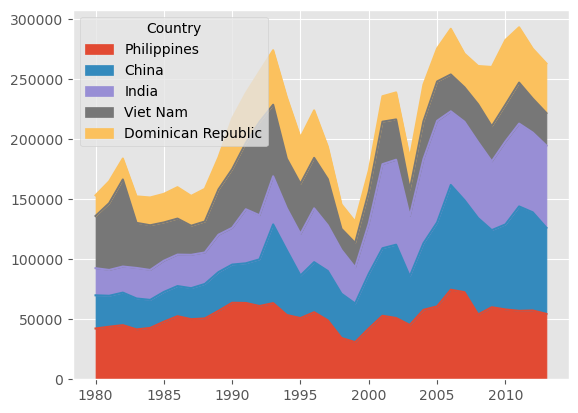

In [120]:
# pulls the top 5 nations from the list
df_top5 = df_usa.sort_values('Total', ascending=False).head(6)
df_top5 = df_top5[1:]
df_top5.drop(['Continent', 'Region', 'DevName'], axis=1, inplace=True)
df_top5.head(5)
years = list(map(str, range(1980, 2014)))

df_top5[years].T[['Philippines', 'China', 'India', 'Viet Nam', 'Dominican Republic']].plot.area()

# Bar Charts of immigrations from all countries in 2013 <a id="10"></a>

A bar plot is a way of representing data where the *length* of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals. Please use bar charts to visualize how all the countries contributed immigrants to USA in 2013.

Reference: [Bar plot using pandas dataframe] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

<Axes: xlabel='Country'>

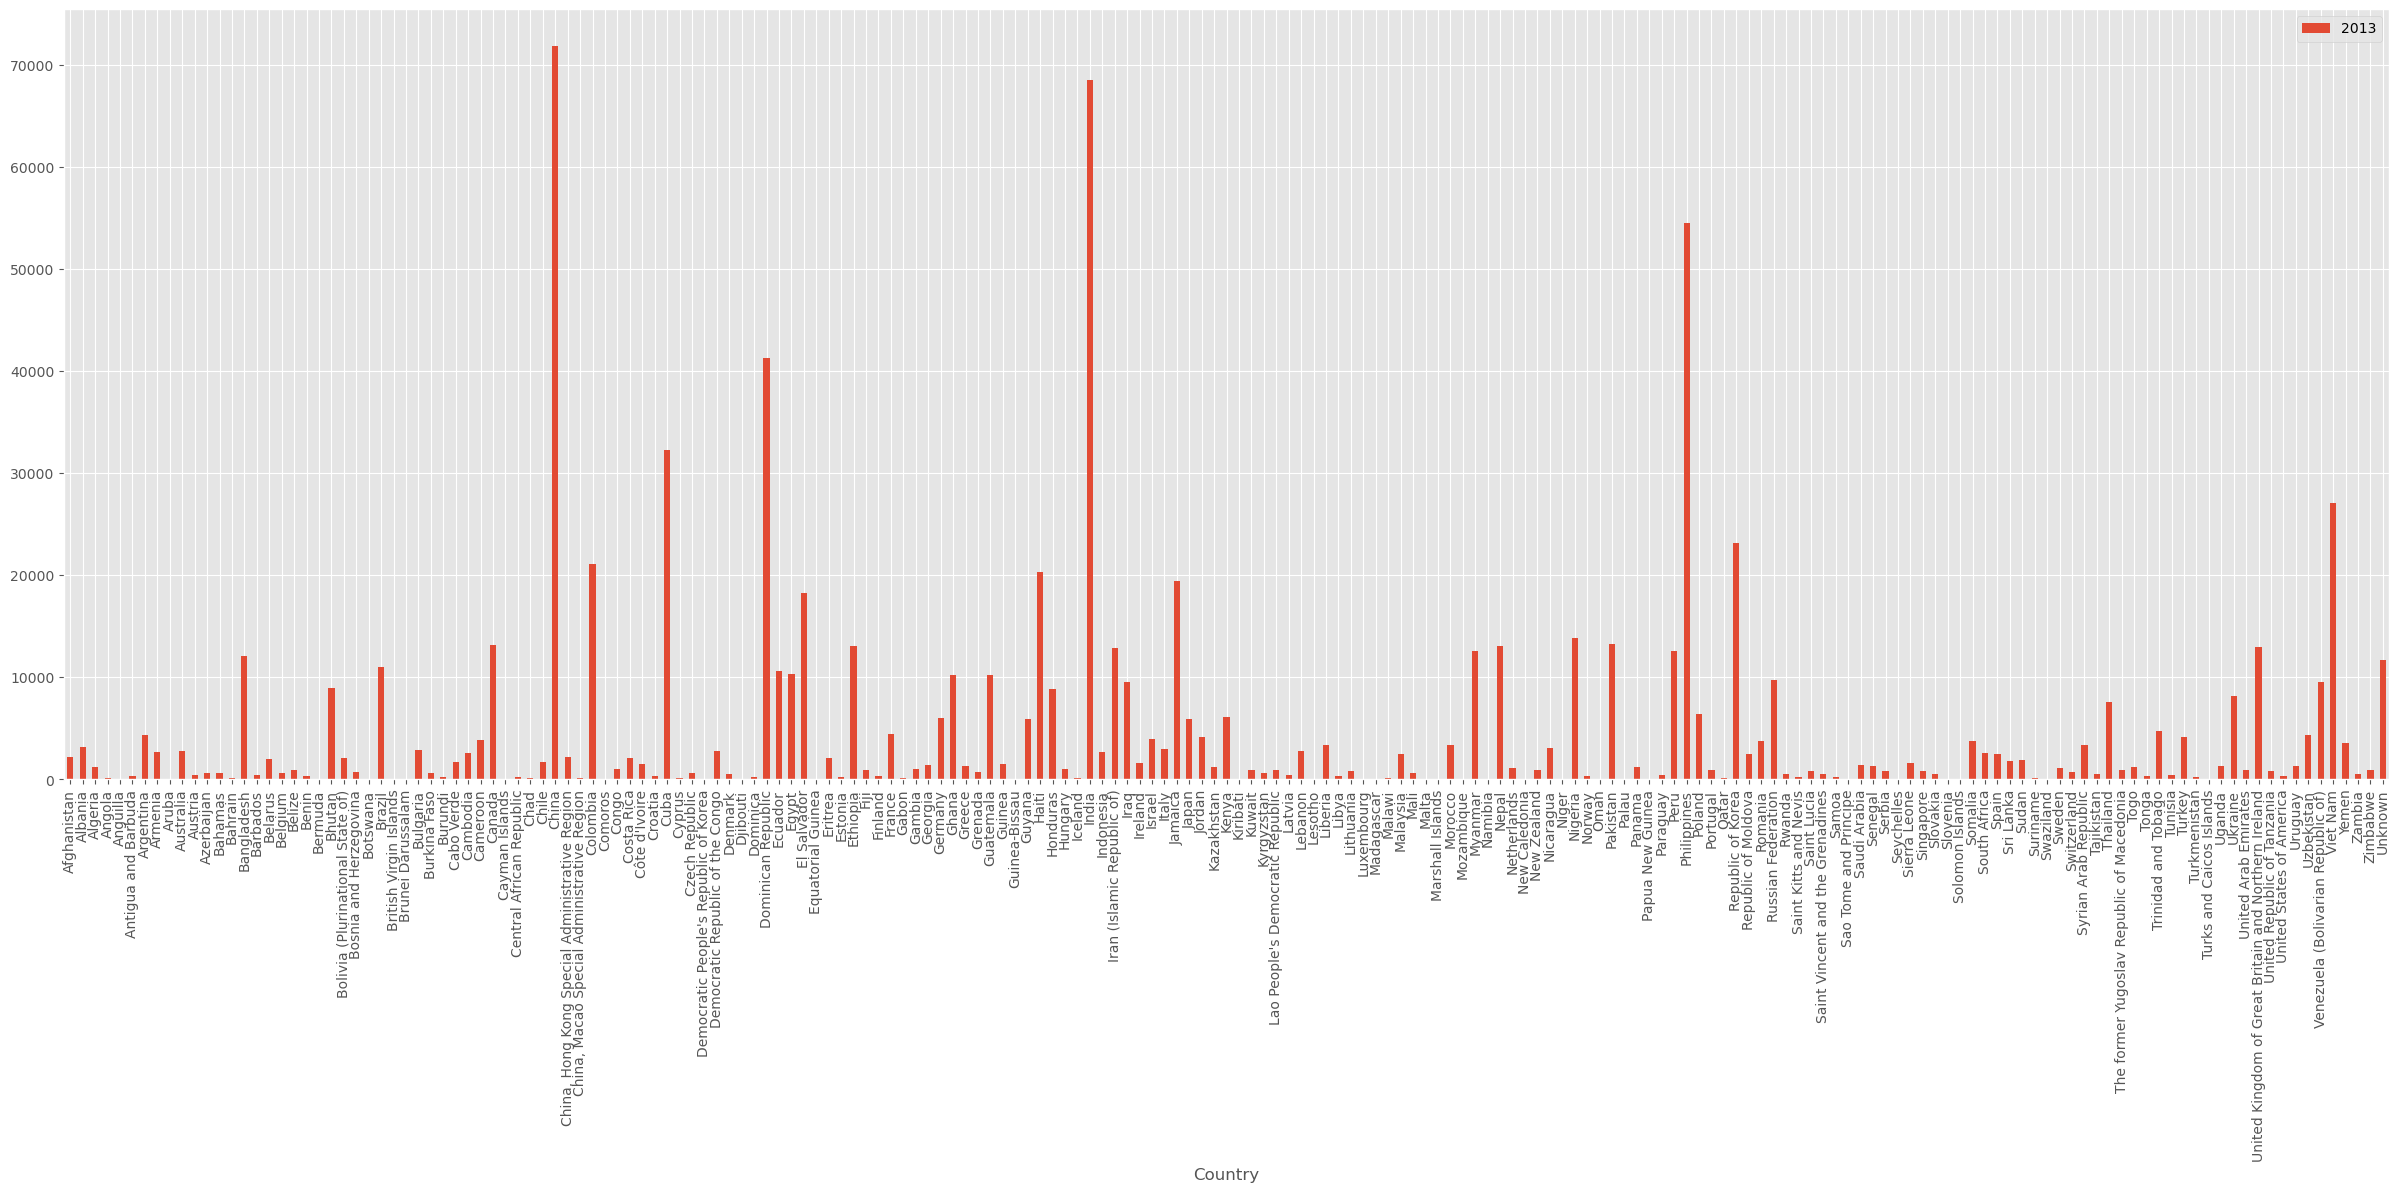

In [123]:
# Filter out bad data
df_2013 = df_usa.filter(['Country','2013'])
df_2013 = df_2013[df_2013['2013'].notna()]
df_2013 = df_2013.query("Country != 'Total'")

df_2013.plot.bar(figsize=(30, 10)) #enlarged for readability

# Pie Charts of accumulated immigrations from all countries <a id="10"></a>

A pie chart is a circular statistical graphic, which is divided into slices to illustrate numerical proportion. In a pie chart, the arc length of each slice, is proportional to the quantity it represents. 

Reference: [Pie plot using pandas dataframe] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html

<Axes: ylabel='Total'>

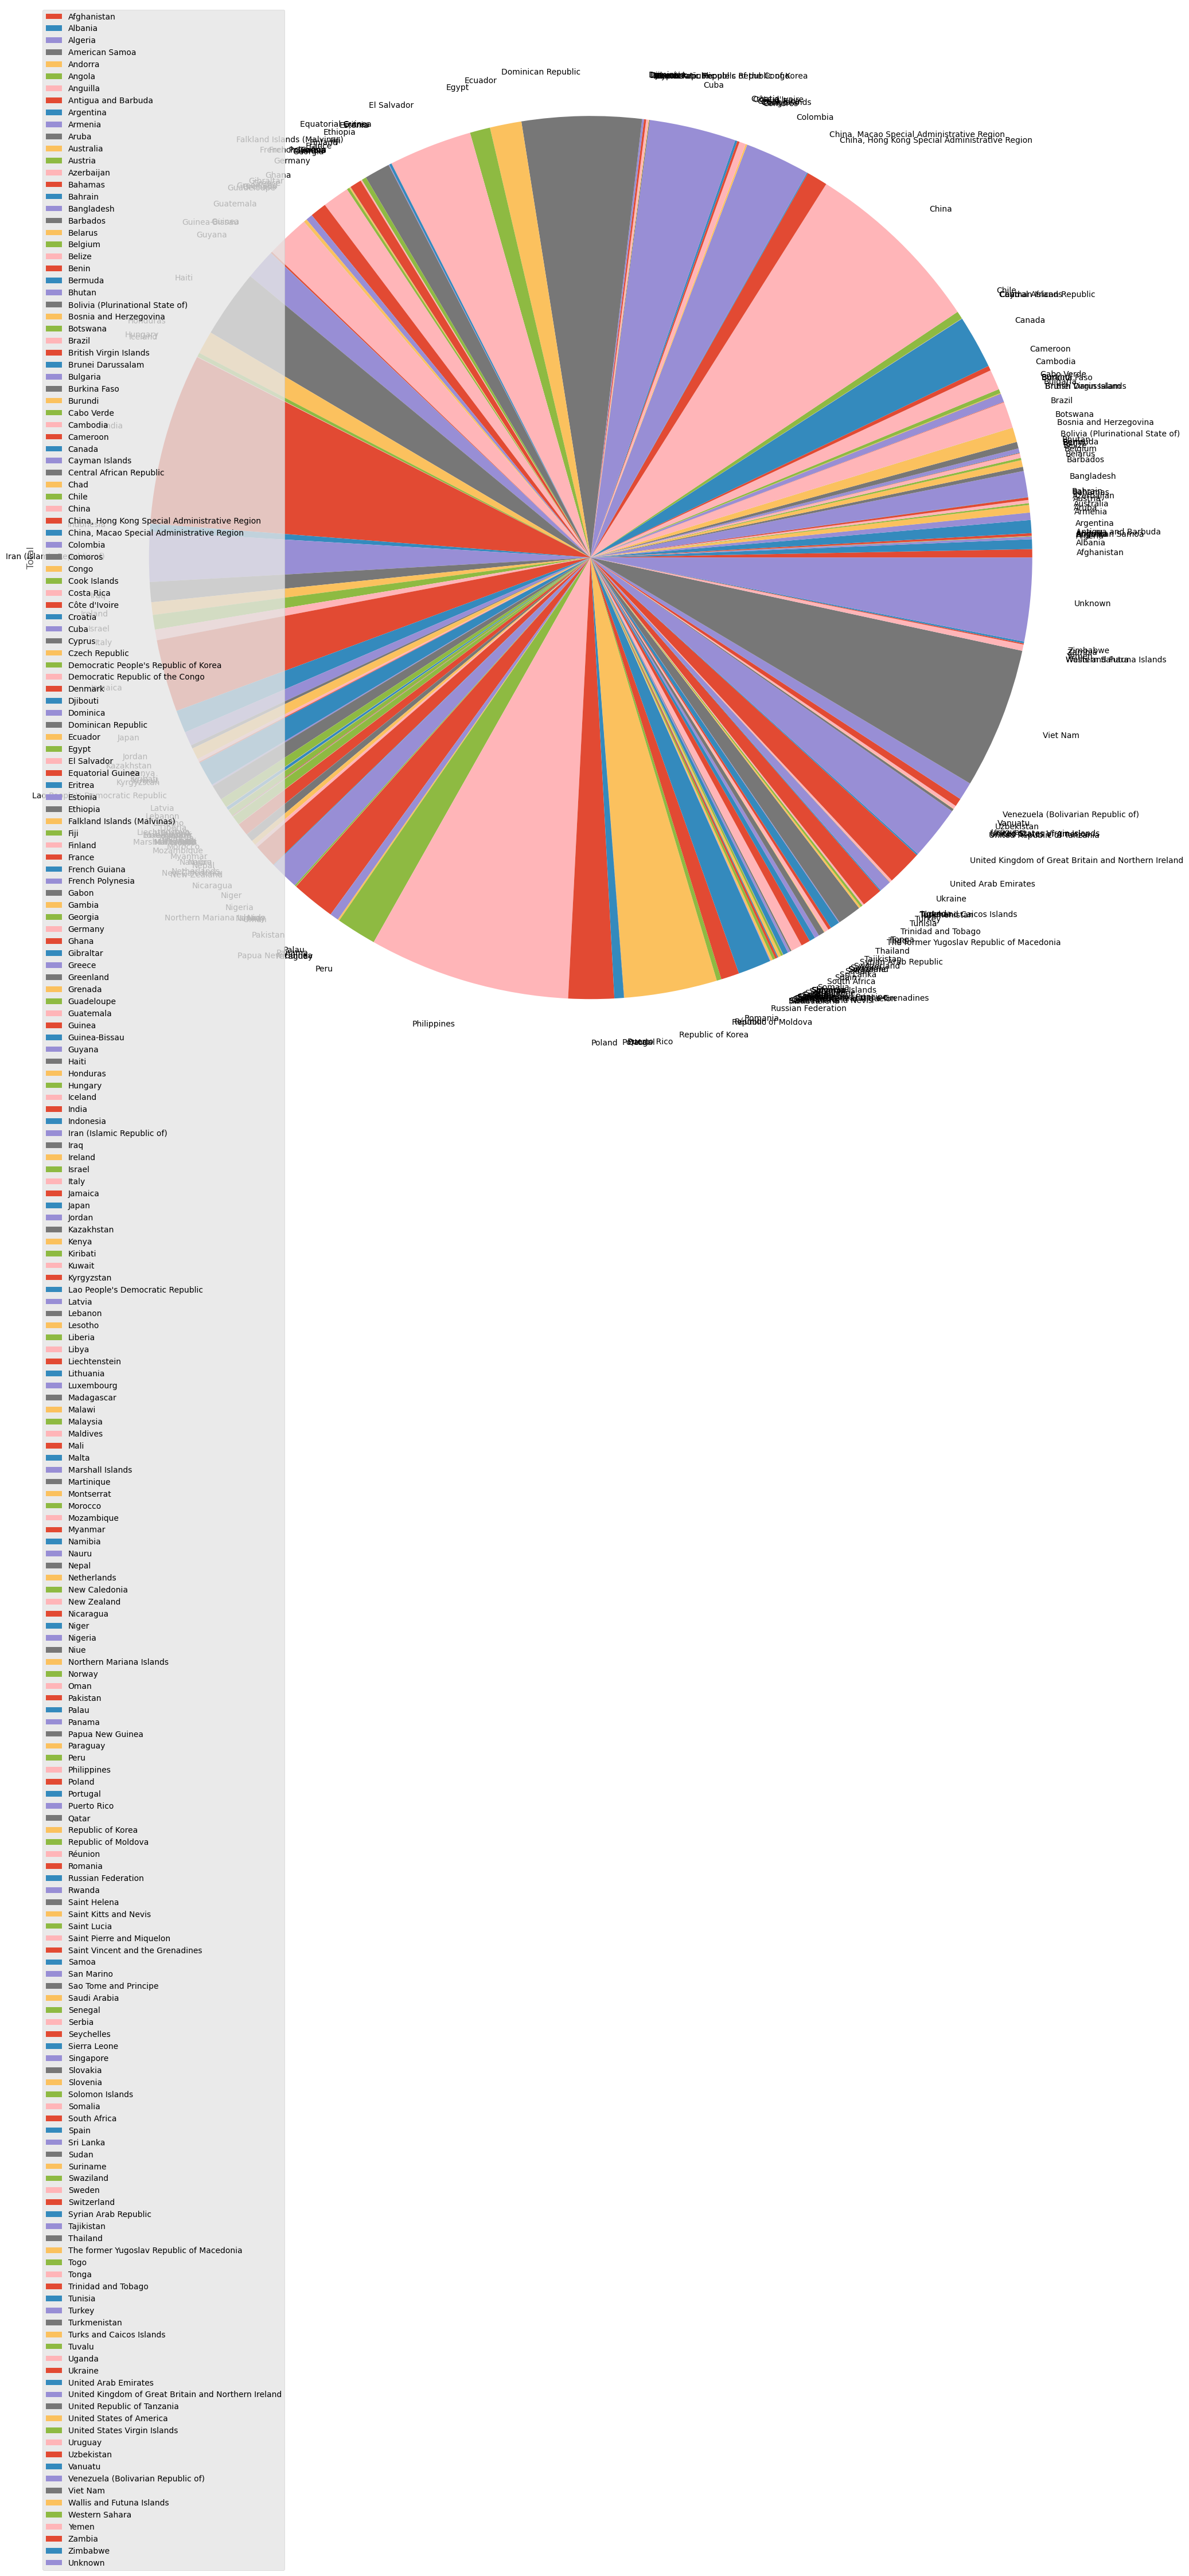

In [122]:
# Filter out data
df_pie = df_usa.filter(['Country','Total'])
df_pie = df_pie[df_pie['Total'].notna()]
df_pie = df_pie.query("Country != 'Total'")
df_pie.head(100)

df_pie.plot.pie(y='Total', figsize=(25, 25)) #enlarged for readability